In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import seaborn as sns
from collections import Counter

In [2]:
import matplotlib as mpl

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

# The Ising model in 2D
The Hamiltonian of the Ising model is

$$
\mathcal{H} = -\sum_{\langle ij \rangle} J s_i s_j - H \sum_i s_i
$$

In this exercise, we focus on the case $J=1, H=0$, that is, a ferromagnetic system with no external field. Remember that the sum $\langle ij \rangle$ runs over neighbouring sites only. In our 2D lattice, each site has 4 neighbours. 

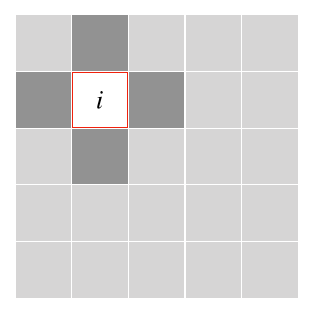 


We will work with **periodic boundary conditions**, so that all spins have 4 neighbours. 

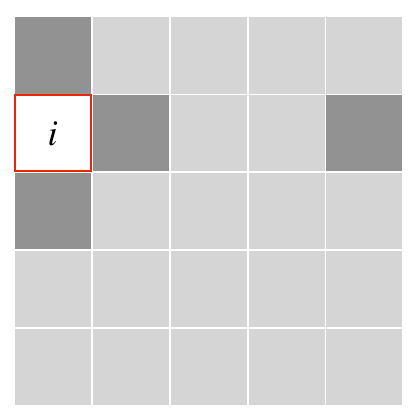 


# The Metropolis algorithm
We will build a simple implementation of the **Metropolis** algorithm for the 2D Ising model. 

As a reminder, a single update of the Metropolis algorithm works as follows:

1. Pick a site $(i, j)$ at random.
2. Calculate the energy change $\Delta E$ that flipping the spin $s_{ij}$ would produce.
3. If $\Delta E <0$, flip the spin with probability $1$.
4. If $\Delta E >0$, flip the spin with probability $e^{-\beta \Delta E}$.

### Exercice 4.1
Write a function that, given an integer $N$, returns an $N \times N$ array whose elements are randomly picked from {-1, 1}. 

In [3]:
def create_initial_config(N=None):
    """
    Create the starting initial configuration.
    
    All elements are {-1, 1} with 50% prob.
    The lattice is a square of size N.
    
    Parameters
    ----------
    N : int
        The system size.

    Returns
    -------
    config : np.array, (N, N)
        A random {-1, 1} array of size (N, N).
    """

    config = np.random.choice([-1, 1], size=(N,N))
    
    return config

Let us create an initail configuration with our `create_inital_config_function`. A system size of $N=100$ will be enough.

In [4]:
config = create_initial_config(N=100)

To plot our system we can use `plt.imshow()`, as follows:

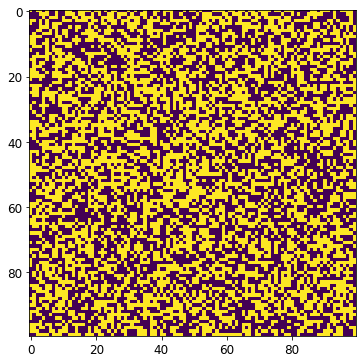

In [5]:
plt.figure(figsize=(6,6));
plt.imshow(config);

### Exercise 4.2
We will write our Metropolis update function. Given a site $(i, j)$, what is the change in energy $\Delta E$ that flipping $S(i, j)$ entails?
Recall that only 4 spins are connected to $(i, j)$, so you don't need to compute the energy of the whole system.

*Your answer here*
#### Answer
The change in energy is $\Delta E = 2 S(i,j) \left[S(i+1,j)+S(i-1,j)+S(i,j+1)+S(i,j-1)\right]$, where the periodic boundary conditions of the system are implied. 

### Exercise 4.3
Write a function called `metropolis_single_update()`.  
The **input** should be:

+ *config*, a lattice configuration as an (N, N) array.
+ *T*, the temperatue.

There is no need to return anything since in python, functions can modify its input, so we will be updating config *inplace*. But it is useful to return the energy change $\Delta E$ if one later wants to track the energy during simulations. To simplify things, we will use **periodic boundary conditions** (in python, the modulo operator is `%`).

In [6]:
def metropolis_single_update(config=None, T=None):
    '''
    Do a single Monte Carlo update using Metropolis algorithm.
    
    Parameters
    ----------
    config : np.array, (N, N)
        The current configuration.
    T : float
        The temperature.

    '''
    # make sure config is square
    N, M = config.shape
    assert N == M
    
    # choose random site
    i = np.random.randint(0, N)
    j = np.random.randint(0, N)
    s =  config[i, j]
        
    # compute energy cost of flip
    # DeltaE is the possible energy cost
    # effDeltaE is the real energy cost (depending on whether we did the flip or not)
    DeltaE = 2*s*(config[i,(j+1)%N]+config[(i+1)%N,j]+config[i,(j-1)%N]+config[(i-1)%N,j])
    effDeltaE = 0

    # case DeltaE < 0, flip the spin with prob 1 
    if DeltaE < 0:
        # flip the sping
        s *= -1
        # set effective DeltaE to DeltaE 
        effDeltaE = DeltaE
        
    # case DeltaE >= 0
    else:
        # flip the spin with certain probability
        if np.random.uniform() <= np.exp(-DeltaE/T) :
            # flip the sping
            s *= -1
            # set effective Delta E 
            effDeltaE = DeltaE
        
    # update configuration
    # notice there is no need to return the whole configuration, the function
    # will modify config _in_place_
    config[i, j] = s
    
    # but it is clever to return the effective DeltaE, since we have already computed it
    # notice that if we didn't flip the spin, the change in energy is 0
    return effDeltaE

## Visualizing the simulation on real time
To see if our Metropolis algorithm works, you might want to simulate systems at different temperatures, and observe how the configuration evolves trought time. To do this you need the `display` module. Below you will find an example of how to use it.

For the 2D Ising model, the **critical temperature** is known to be
$$
T_c = \frac{2}{\ln(1+\sqrt{2})} \simeq 2.2691853...
$$
(with $k_B=1$). Try executing the cell below at different values of the temperature, for different system size. 

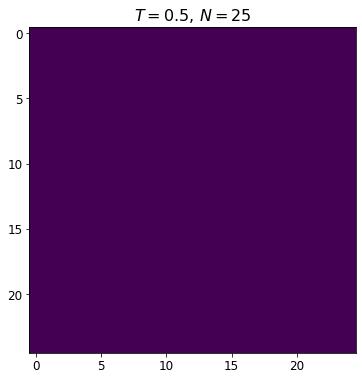

In [7]:
T1 = 0.5
N1 = 25
# create initial random configuration
config = create_initial_config(N=N1)

# set up figure, plot first frame
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.set_title(r"$ T=$" + str(T1) + r", $N=$"+ str(N1));
# draw the initial configuration,
# naming the plot "im".
im = ax.imshow(config)

for t in range(100000):
    # update the system
    DeltaE = metropolis_single_update(config, T=T1)
    # replot every 1000 MC updates
    if t%1000==0:
        # update the data of the plot (not the whole figure!)
        im.set_data(config)
        # rerender
        display.display(plt.gcf())
        display.clear_output(wait=True)

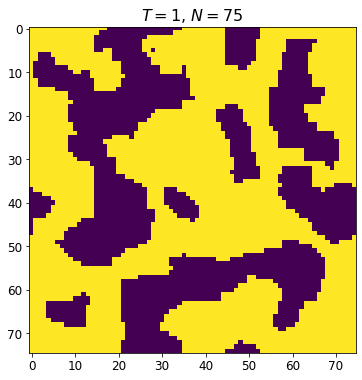

In [8]:
T2 = 1
N2 = 75
# create initial random configuration
config = create_initial_config(N=N2)

# set up figure, plot first frame
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.set_title(r"$ T=$" + str(T2) + r", $N=$"+ str(N2));
# draw the initial configuration,
# naming the plot "im".
im = ax.imshow(config)

for t in range(100000):
    # update the system
    DeltaE = metropolis_single_update(config, T=T2)
    # replot every 1000 MC updates
    if t%1000==0:
        # update the data of the plot (not the whole figure!)
        im.set_data(config)
        # rerender
        display.display(plt.gcf())
        display.clear_output(wait=True)

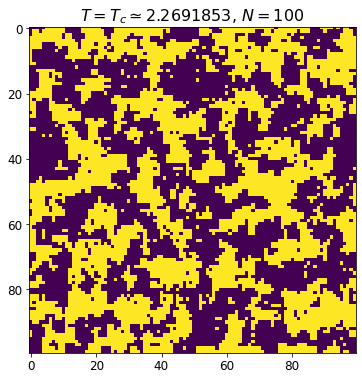

In [9]:
T_c = 2/np.log(1+np.sqrt(2))
N0 = 100
# create initial random configuration
config = create_initial_config(N=N0)

# set up figure, plot first frame
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.set_title(r"$ T = T_c \simeq $" + str("%.7f" % T_c) + r", $N=$"+ str(N0));
# draw the initial configuration,
# naming the plot "im".
im = ax.imshow(config)

for t in range(100000):
    # update the system
    DeltaE = metropolis_single_update(config, T=T_c)
    # replot every 1000 MC updates
    if t%1000==0:
        # update the data of the plot (not the whole figure!)
        im.set_data(config)
        # rerender
        display.display(plt.gcf())
        display.clear_output(wait=True)

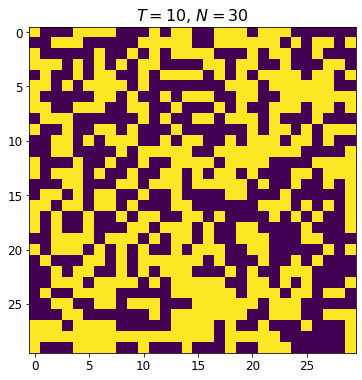

In [10]:
T3 = 10
N3 = 30
# create initial random configuration
config = create_initial_config(N=N3)

# set up figure, plot first frame
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.set_title(r"$ T=$" + str(T3) + r", $N=$"+ str(N3));
# draw the initial configuration,
# naming the plot "im".
im = ax.imshow(config)

for t in range(100000):
    # update the system
    DeltaE = metropolis_single_update(config, T=T3)
    # replot every 1000 MC updates
    if t%1000==0:
        # update the data of the plot (not the whole figure!)
        im.set_data(config)
        # rerender
        display.display(plt.gcf())
        display.clear_output(wait=True)

### Exercice 4.4
Write a function that computes the energy of a configuration, and another that tracks its evolution over time.

In [11]:
def get_energy(config):
    """
    Compute the energy of a configuration.
    
    The energy is defined as $E = -\sum_{(a, b)} S_a S_b$,    
    where the sum runs over pairs of adjacent spins.
    
    Parameters
    ----------
    config : np.array, (N, N)
        The system configuration.
        
        
    Returns
    -------
    E : float
        The energy of the configuration.
    """
    N = len(config)
    # list of pairs of adjacent sites as four-element tuples:
    # (i1, j1, i2, j2) represents two adjacent sites located
    # at (i1, j1) and (i2, j2)
    horizontal_edges = [
        (i, j, i, (j+1)%N)
        for i in range(N) for j in range(N)
    ]
    vertical_edges = [
        (i, j, (i+1)%N, j)
        for i in range(N) for j in range(N)
    ]
    # summing lists in python concatenates them
    # [1, 2, 3] + [4, 5] = [1, 2, 3, 4, 5]
    edges = horizontal_edges + vertical_edges
    E = 0
    for i1, j1, i2, j2 in edges:
        E -= config[i1, j1] * config[i2,j2]
    
    return E

In [12]:
def get_energy_evolution(N=20, T=2/np.log(1+np.sqrt(2)), n_updates=50000):
    """
    Compute the energy evolution of a 2D Ising instance.
    
    Parameters
    ----------
    N : int
        The system size.
    T : float
        The temperature.
    n_updates : int
        Number of Metropolis updates.
        
    Returns
    -------
    Es : np.array, (n_updates, )
    """
    
    config = create_initial_config(N)
    Es = np.zeros(n_updates)
    for i in range(n_updates):
        Es[i]=get_energy(config)
        metropolis_single_update(config,T)
    
    return Es

### Exercise 4.5
Compute the energy of your system during a long simulation, and plot it as a function of time. **Tip** Use logarithmic x-axis!

In [13]:
%%time
N=100
T1=1.5
T2=3.5
T_c = 2/np.log(1+np.sqrt(2))
nup=10**6
energy_evolutionT1 = get_energy_evolution(N=N, T=T1, n_updates=nup)
energy_evolutionTc = get_energy_evolution(N=N, T=T_c, n_updates=nup)
energy_evolutionT2 = get_energy_evolution(N=N, T=T2, n_updates=nup)

KeyboardInterrupt: 

NameError: name 'energy_evolutionTc' is not defined

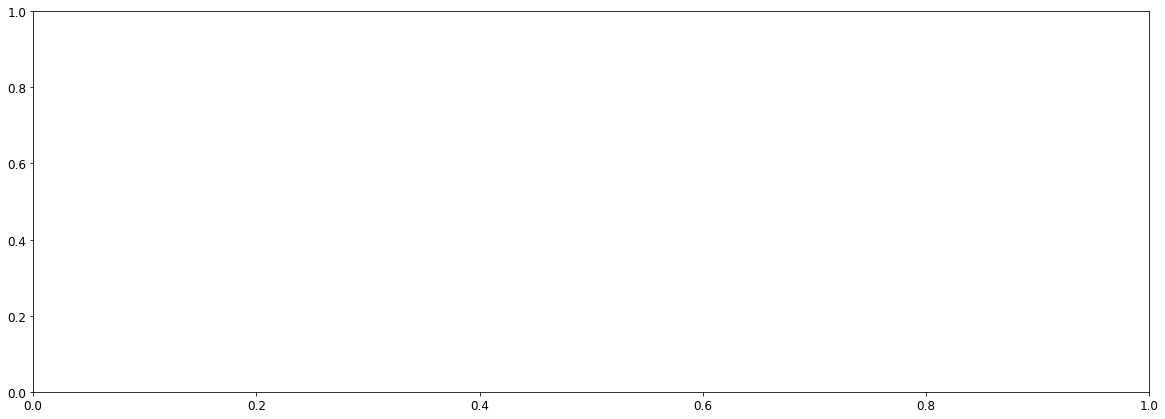

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
t=np.linspace(0,len(energy_evolutionTc),len(energy_evolutionTc))
ax.semilogx(t, energy_evolutionT1, label=r"$T=$" + str(T1))
ax.semilogx(t, energy_evolutionTc, label=r"$T=T_c \simeq $" + str("%.7f" % T_c))
ax.semilogx(t, energy_evolutionT2, label=r"$T=$" + str(T2))
ax.set_xlabel(r"$Number$  $of$  $Sweeps$")
ax.set_ylabel(r"$ Energy $")
ax.hlines(-20000, 0, len(energy_evolutionTc), label="Minimum energy = -20000", color="red")
ax.legend(loc=(1.1, 0.7), frameon=False)
ax.set_title(r" Energy evolution of a system with $N=$"+ str(N));
ax.legend();

### Exercise 4.6
Can you distinguish two qualitatively different periods? What do they correspond to?

*Your answer here*

#### Answer

There are two qualitatively different periods, before and after $t=t^{\star}\simeq 10^5$ ÷ $10^6$ (Depending on the temperature).

Before $t=t^{\star}$ the energy of the system drops to reach the equilibrium' energy, while after $t=t^{\star}$ the energy oscillates around it.

# Efficient Metropolis
Our implementation of the Ising model was not very efficient. To do this exercice, we will use part of the code from Sethna's book, which is much more efficient and can be found here:

[Sethan's book computer exercices](http://pages.physics.cornell.edu/~myers/teaching/ComputationalMethods/ComputerExercises/Ising/Ising.html)

To import code from an external file, we need to add its directory to the PATH



In [15]:
import sys
sys.path.append("code/")
from ising_sethna import IsingModel

Their implementation is based on a `Class`, which means we need to instantiate the model. For instance:

In [16]:
# create an instance of IsingModel
ising = IsingModel(N=100)

In [17]:
# the state of the system is stored in .lattice
ising.lattice

array([[1, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 0, 1]])

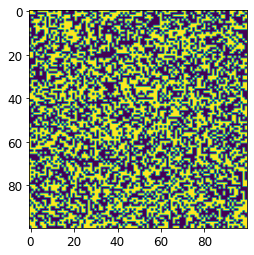

In [18]:
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = True
plt.imshow(ising.lattice);

Notice that this implementation uses 0, 1 spins instead of -1, 1 as we are used to! To run the simulation, we call the `.SweepMetropolis()` method. If you go to the source file at `SethnasBookCode/Ising.py`, you can inspect all the code. You will notice that all `.Sweep...()` methods perform $N^2$ updates per time-step. This is useful because time-scales become independent of system size.

In [19]:
ising.SweepMetropolis(nTimes=100)

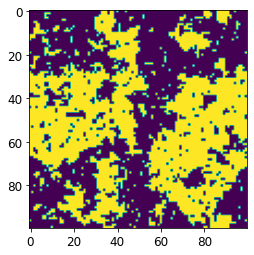

In [20]:
plt.imshow(ising.lattice);

The cell bellow will display 3 systems side-by-side, running at different temperatures. All parameters are set at the top. Try changing some values and see what happens.

In [21]:
#################
# set parameters
system_size = 100
H = 0.0
T_below = 1.5
T_critical = 2.269185314213022
T_above = 3.5
n_sweeps = 100
###############

# create three instances of IsingModel
ising_below = IsingModel(N=system_size, T=T_below, H=H)
ising_critical = IsingModel(N=system_size, T=T_critical, H=H)
ising_above = IsingModel(N=system_size, T=T_above, H=H)

# give them names
isings = [ising_below, ising_critical, ising_above]
labels = ["below $T_c$", "at $T_c$", "above $T_c$"]

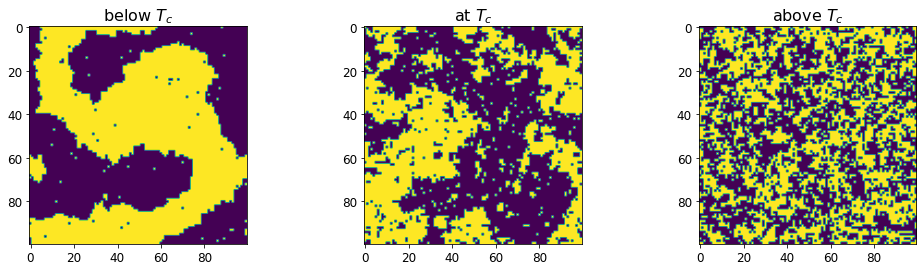

In [22]:
fig, axx = plt.subplots(1, 3, figsize=(17,4))
heatmap = {}
for ax, ising, label in zip(axx, isings, labels):
    heatmap[label] = ax.imshow(ising.lattice)
    ax.set_title(label, fontsize=16)

for _ in range(n_sweeps):
    for ax, ising, label in zip(axx, isings, labels):
        ising.SweepMetropolis(nTimes=1)
        heatmap[label].set_data(ising.lattice)
    display.display(plt.gcf())
    display.clear_output(wait=True)

### Exercice 4.7
How much faster is Sethna's implementation with respect to ours? Use the cell magic `%%timeit` to measure how long a command takes to execute.

To do a fair comparison, remember to take into account what "one update" means for each case.

In [23]:
%%timeit
# your Ising implementation running for some number of updates
N=100; config = create_initial_config(N=N)
for _ in range(N**2):
    metropolis_single_update(config, T=2/np.log(1+np.sqrt(2)))

176 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
%%timeit
# Sethan's implementation running for some **equivalent** number of updates
ising = IsingModel(N=100, T=2/np.log(1+np.sqrt(2)), H=0)
ising.SweepMetropolis(nTimes=1)

36.7 ms ± 682 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


*Your answer here*

#### Answer

To do a fair comparison we have to take into account that "one update" of Sethna's implementation correspond to $N^2$ Metropolis' updates, taken that into consideration we can see that Sethna's implementation is at least four times faster with respect to ours.

## Magnetization
We will now compute the magnetization $M$ as a function of the temperature $T$. To speed up simulations even more, we will use the Wolff algorithm, which Sethna's code already implements in the `.SweepWolff()` method.

### Exercise 4.8
For a system of size $N=100$, approximately how many sweeps of the Wolff algorithm are necessary in practice to be in equilibrium? Try starting with smaller values of $N$, and increase gradually. 

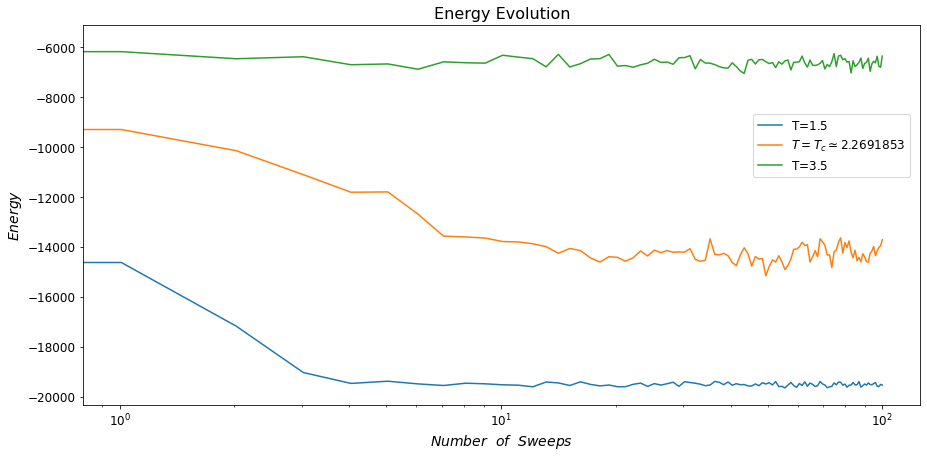

In [25]:
# set system size, temperature
sweeps=100
E1=np.zeros(sweeps)
Ec=np.zeros(sweeps)
E2=np.zeros(sweeps)
T_c=2/np.log(1+np.sqrt(2))
ising_eq1 = IsingModel(N=100, T=1.5, H=0)
ising_eqc = IsingModel(N=100, T=T_c, H=0)
ising_eq2 = IsingModel(N=100, T=3.5, H=0)
# run some Wolff sweeps, check if equilibrium

for t in range(sweeps):
    ising_eq1.SweepWolff(nTimes=1)
    ising_eqc.SweepWolff(nTimes=1)
    ising_eq2.SweepWolff(nTimes=1)
    E1[t]=get_energy(ising_eq1.lattice*2 - 1) #From (0,1) notation for spin to (-1,1) 
    Ec[t]=get_energy(ising_eqc.lattice*2 - 1)
    E2[t]=get_energy(ising_eq2.lattice*2 - 1)
#plot
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
x=np.linspace(0,sweeps,sweeps)
ax.semilogx(x,E1,label="T=$1.5$")
ax.semilogx(x,Ec,label=r"$T=T_c \simeq $" + str("%.7f" % T_c))
ax.semilogx(x,E2,label="T=$3.5$")
ax.set_xlabel(r"$Number$  $of$  $Sweeps$")
ax.set_ylabel(r"$Energy$")
ax.set_title("Energy Evolution")
ax.legend(loc=(0.8, 0.6));

*Your answer here*

#### Answer 

We can see that to reach the equilibrium for a system of size $ N=100 $ the number of sweeps, of the Wolff algorithm, necessary is of the order of $10^1$.

### Exercise 4.9
Write a function that computes the magnetization of a 2D Ising system after certain equilibration period.

In [26]:
def calculate_magnetization(system_size=None, temperature=None, equilibration_time=None):
    """
    Calculate the magnetization of a 2D Ising model.
    
    Parameters
    ----------
    system_size : int
        The lattice size.
    temperature : float
        The simulation temperature.
    equilibration_time : int
        Number of Wolff sweeps before measuring M.
        
    """
    # instantiate model
    ising = IsingModel(N=system_size, T=temperature, H=0)
    # equilibrate
    ising.SweepWolff(nTimes=equilibration_time)
    # compute (total) magnetization
    m = (ising.lattice*2-1).sum() 
    return m


### Exercise 4.10
+ Compute the magnetization for a system of size $N=64$, for diverent values of $T\in[1.5, 3.5]$.
+ Remember to choose wisely the equilibration time!
+ Plot $|M|$ as a function of $T$, and mark the critical temperature in your plot using the `plt.axvline()` function.

In [27]:
# define range of temperatures
temperatures = np.linspace(1.5, 3.5, num=100)
# system size
system_size = 64
# equilibration time
equilibration_time = 20

# loop over temperatures, compute magnetizations
magnetizations = []
for temperature in temperatures:
    magnetization = abs(calculate_magnetization(system_size, temperature, equilibration_time))
    magnetizations.append(magnetization)

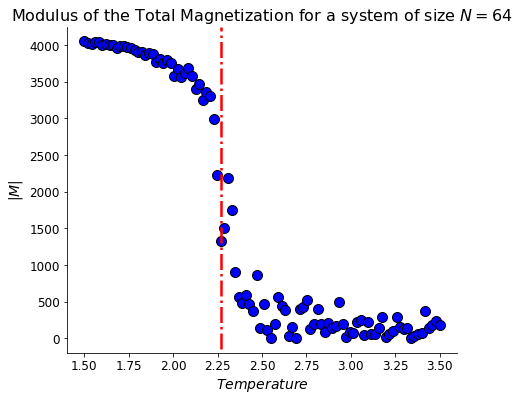

In [28]:
# define critical temperature
T_c = 2/np.log(1+np.sqrt(2))

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

fig, ax = plt.subplots(1, 1, figsize=(7,6))
ax.scatter(
    temperatures, magnetizations,
    #style keywords
    edgecolors="black", color="blue", 
    s=100
)
ax.axvline(
    x=T_c, ymin=-0.5, ymax=1,
    # style keywords
    c="red", lw=2.5, ls="-."
)
ax.set_title(r"Modulus of the Total Magnetization for a system of size $N=64$")
ax.set_xlabel(r"$Temperature$")
ax.set_ylabel(r"$|M|$");

## Susceptibility and Specific Heat


In this exercice, we will compute the susceptibility $\chi$ and the specific heat $C$. Using formula (6.13) in the book, we have that
$$
C = \frac{1}{T^2} \left\langle (E - \langle E \rangle)^2 \right\rangle.
$$
Remember that this is only valid in **equilibrium**, which means that we can only measure energy fluctuations **after a transient** equilibration time.

### Exercise 4.11
Find a convenient formula to measure the susceptibility $\chi$ in a simulation.

*Your answer here*

#### Answer

$$
\chi = \frac{1}{T} \left\langle (M - \langle M \rangle)^2 \right\rangle=\frac{1}{T} \left (\langle M^2\rangle - \langle M \rangle^2) \right.
$$

### Exercise 4.12
Write a function that computes the energy of an Ising configuration.

As usually, you can use the **template** below if it helps you, or if you prefer you can also write **your own function** from scratch.

In [29]:
def compute_energy(ising):
    """Compute the energy of an ising object."""
    config = ising.lattice*2-1
    N = len(config)
    horizontal_edges = [
        (i, j, i, (j+1)%N)
        for i in range(N) for j in range(N)
    ]
    vertical_edges = [
        (i, j, (i+1)%N, j)
        for i in range(N) for j in range(N)
    ]    
    edges = horizontal_edges + vertical_edges
    E = 0
    for i1, j1, i2, j2 in edges:
        E -= config[i1, j1] * config[i2,j2]
    return E / N**2

#### N.B.

This is the energy per spin, not the total energy of the configuration, if we want the total energy we can just use the old "get_energy" function (from exercise 4.4) with the proper argument, i.e. `ising.lattice*2-1`.

### Exercise 4.13
Write a function that computes the susceptibility and the specific heat of a 2D Ising system. You might use the Wolff algorithm to speed up your simulations.

In [30]:
def calculate_susceptibility_specific_heat(system_size=None, temperature=None, equilibration_time=None, n_samples=None):
    """
    Simulate a 2D Ising model and measure its
    specific heat and susceptibility at equilibrium.
    
    Parameters
    ----------
    system_size : int
        The lattice side length.
    temperature :  float.
        The simulation temeperature.
    equilibration_time : int
        A transient period to allow for thermalization.
    n_samples : int
        The number of samples taken to compute fluctuations.

    """
    # initiate model
    ising = IsingModel(N=system_size, T=temperature, H=0)
    # thermalize
    ising.SweepWolff(nTimes=equilibration_time)
    
    # create empty lists for magnetizations, energies, and their squares
    ms = []
    m2s = []
    es = []
    e2s = []
    
    # loop over n_samples 
    for i in range(n_samples):
        # change from 0,1 to -1,1 notation
        config=ising.lattice*2-1
        # get magnetization
        m = (config).sum()
        ms.append(m)
        m2s.append(m**2)
        # get energy
        e = get_energy(config)
        es.append(e)
        e2s.append(e**2)
        # update system
        #ising = IsingModel(N=system_size, T=temperature, H=0)
        ising.SweepWolff(nTimes=1)
    #compute susceptibility and specific heat
    susceptibility = (np.mean(m2s)- pow(np.mean(ms),2))/(temperature)
    specific_heat = (np.mean(e2s)- pow(np.mean(es),2))/(pow(temperature,2))
    
    return susceptibility, specific_heat



#### N.B.

With this fuction we have calculated the total specific heat and the total susceptibility of the system, and NOT their counterparts per spin; this because we used the formulas listed above that cointain respectively the total energy and the total magnetization of the system.

### Exercise 4.14
+ Compute $C$ and $\chi$ at different temperatures, for a small system of size $N<50$. You will need to find what are the right equilibration times. A good range of temperatures is $T \in [1.5, 3.5]$.
+ Make two plots, showing $\chi$ and $C$ as a function of $T$. Mark the critical temperature $T_c$ with a vertical line using `ax.axvline(...)`.

In [31]:
# define range of temperatures: 50 points from 1.5 to 4.
temperatures = np.linspace(1.5, 4, num=50)
# system size
system_size = 35
# equilibration time
equilibration_time = 20
# n_samples
n_samples = 100

# loop over temperatures, compute susceptibility and specific_heat
susceptibilities = []
specific_heats = []

for temperature in temperatures:
    susceptibility, specific_heat = calculate_susceptibility_specific_heat(system_size, temperature, equilibration_time, n_samples)
    susceptibilities.append(susceptibility)
    specific_heats.append(specific_heat)

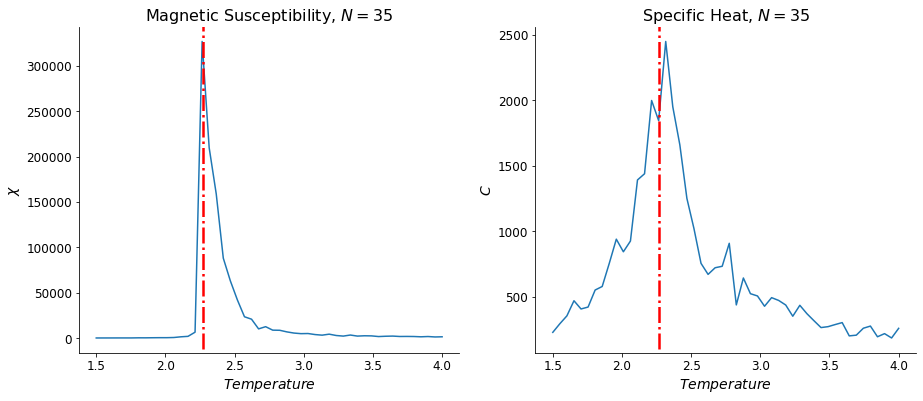

In [32]:
T_c = 2/np.log(1+np.sqrt(2))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

ax=ax1
ax.plot(temperatures, susceptibilities)
ax.axvline(
    x=T_c, ymin=-4000, ymax=4000,
    # style keywords
    c="red", lw=2.5, ls="-."
)
ax.set_ylabel(r"$\chi$")
ax.set_xlabel(r"$Temperature$")
ax.set_title(r"Magnetic Susceptibility, " r"$N=$" + str(system_size));

ax=ax2
ax.plot(temperatures, specific_heats)
ax.axvline(
    x=T_c, ymin=-4000, ymax=4000,
    # style keywords
    c="red", lw=2.5, ls="-."
)
ax.set_ylabel(r"$C$")
ax.set_xlabel(r"$Temperature$")
ax.set_title(r"Specific Heat, " r"$N=$" + str(system_size));


#### N.B.

As mentioned and reasoned above, these plots represent the total specific heat and the total susceptibility of the system, and NOT their counterparts per spin.

### Exercise 4.15
Discuss whether or not your results proof the existence of a phase transition.

*Your answer here*

#### Answer

There is a phase transition for $T=T_c$ since the above graphs are not differentiable for that temperature.

The order of the phase transition depends if for $T=T_c$ there actually is a discontinuty or it is just a not differentiable point.

# Finding clusters
Given an Ising configuration, we define a cluster of spins as a set of neighbouring spins of the same sign surrounded by spins of the opposite sign.

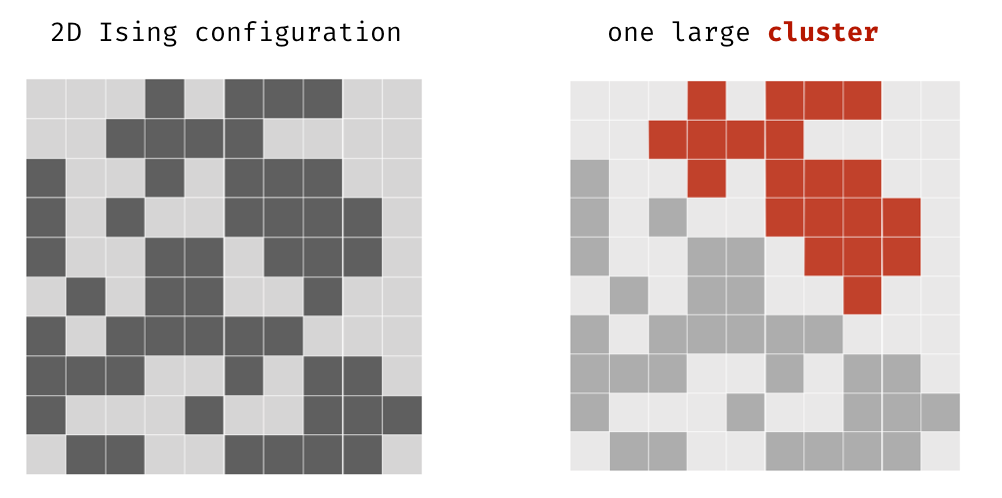

### Exercise 4.16
The formal definition of cluster is very clear, but in practice, how do you find (*efficiently* if possible) all clusters for a given configuration? We need to assign a **unique cluster label** to each spin. The cluster label could be anything (a color, a letter, a number...), it just needs to be the same for all spins that belong to the same cluster. For simplicity, we will use integers.

Think about an algorithm that assigns unique cluster labels to spins. Explain your algorithm in simple words / steps / pseudocode.

Remember:
+ Clusters can trespass (periodic) boundary conditions
+ Both `+1`'s and `-1`'s can form clusters!

*Your answer here*

#### Answer

We start relaxing the periodic boundary conditions, this because we want to check only the sites that are already assigned to a cluster and moreover we want to check only 2 neigbours site for each step, the one on the left and the one on top, this will halve the number of operations; and so we just have to check the top and the left border for boundary conditions once we are finished.

To do this we have to divide the matrix in 4 regions: the origin (we just assign a label), the first row (we check only on the left), the first column (we check only on top) and the remaining $(N-1)$x$(N-1)$ matrix (both left and up).

The process is the following:

Using the above metod of advancing, for each site we check its left neighbor (for the first column it's the top one), if it has the same spin we then assign the same label and we put all of them in a list (the reason is explained below), otherwise we assign new label.

If we encounter a site that has the same spin of both the site on the left and on top we check and assign the same label of all the items in both lists (and we merge the lists).

At the end we check the borders for boundary conditions.

### Exercise 4.17
Write a function that, given a configuration array `config`, returns another array `labels` where each cluster has a different label.

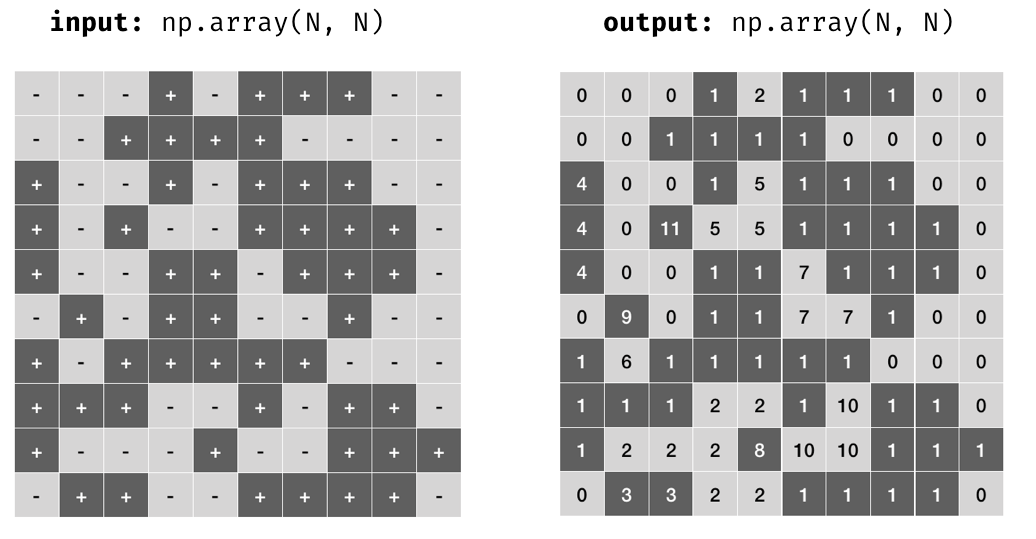

Remember:
+ Clusters can trespass (periodic) boundary conditions
+ Both `+1`'s and `-1`'s can form clusters!


In [33]:
def get_labels(config):

    """
    Get unique cluster labels.
    
    Parameters
    ----------
    config : np.array, (N, N)
        Configuration of the system in {-1, 1} notation
    Returns
    -------
    labels : np.array, (N, N)
        Labels that identify the clusters
    """
    N = len(config)
    labels = np.zeros((N,N), int)
    clusters = [] #set a nested list of clusters
    clusters.append([[0,0]])
    label = 1 #label 1 is the origin
    
    for j in range(1, N): # we check the first row
        if config[0,j] == config[0,j-1]: # if it has the same spin as its left neighbor
            labels[0,j] = labels[0,j-1] # we assign the same label (cluster's name)
            clusters[labels[0,j]].append([0,j]) # and we add the site to that cluster
        else:
            labels[0,j] = label #else we create a new cluster
            clusters.append([[0,j]])
            label +=1
            
    for i in range(1, N): # then we check the first column
        if config[i, 0] == config[i-1, 0]: # same as the first row but with above <-> left
            labels[i,0] = labels[i-1,0]
            clusters[labels[i,0]].append([i,0])
        else: 
            labels[i,0] = label
            clusters.append([[i,0]])
            label +=1    
            
    for i in range(1, N): # Now we check the remaining (N-1)x(N-1) matrix
        for j in range(1, N):
            if config[i, j] == config[i-1, j]: # check on the left
                labels[i,j] = labels[i-1,j]
                clusters[labels[i,j]].append([i, j])
                if config[i, j] == config[i,j-1] and labels[i,j-1] != labels[i-1,j]: # with this we merge clusters that have different labels but have the same spin
                    clusters[labels[i-1,j]].extend(clusters[labels[i,j-1]]) # we merge the lists
                    labdel = labels[i,j-1]
                    for pos in clusters[labels[i,j-1]]: # and we use the same label
                        labels[pos[0],pos[1]] = labels[i,j] 
                    clusters[labdel] = -1 # we don't want to complete delete the list because otherwise the list will shift and mess the labels! 
            elif config[i, j-1] == config[i,j]: # check on top (but left is different!)
                labels[i,j] = labels[i,j-1]
                clusters[labels[i,j]].append([i, j])
            else:
                labels[i,j] = label # else new cluster
                clusters.append([[i,j]])
                label +=1 
                
    # We now do the same to check for periodic boundary conditions
    for j in range(N): # the first and the last row
        if config[0, j] == config[-1%N, j] and labels[0,j] != labels[-1%N,j]:
            clusters[labels[0,j]].extend(clusters[labels[-1%N,j]])
            lab_del = labels[-1%N,j]
            for pos in clusters[labels[-1%N, j]]:
                labels[pos[0],pos[1]] = labels[0,j]
            clusters[lab_del] = -1
    
    for i in range(N): # the first and the last column
        if config[i, 0] == config[i, -1%N] and labels[i,0] != labels[i,-1%N]:
            clusters[labels[i,0]].extend(clusters[labels[i,-1%N]])
            lab_del = labels[i,-1%N]
            for pos in clusters[labels[i,-1%N]]:
                labels[pos[0],pos[1]] = labels[i,0] 
            clusters[lab_del] = -1
            
    # This is not necessary, but since we didn't delete the duplicate lists I just wanted to use numbers from 1 to #clusters but we
    # could have used "pippo" "pluto" "topolino" etc. as names, since indeed, cluster's labels are just name to distinguish them.
    counter = 1 
    for c in clusters: 
        if c != -1: # clusters = -1 are the "deleted" ones
            for pos in c:
                labels[pos[0],pos[1]] = counter
            counter += 1
       
    return labels

# Test your function
To help you **test** your function, I have prepared some test data, so that we can all try our algorithms using the same input.

In [34]:
config_test_0 = np.array([[ 1,  1,  1],
                          [-1, -1,  1],
                          [-1, -1,  1]])

In [35]:
config_test_1 = np.array([[ 1, -1, -1,  1, -1,  1],
                          [-1, -1, -1,  1, -1,  1],
                          [-1,  1, -1, -1, -1,  1],
                          [-1,  1, -1,  1,  1,  1],
                          [-1,  1, -1, -1,  1, -1],
                          [-1, -1, -1,  1,  1,  1]])

In [36]:
config_test_2 = np.array([[ 1, -1,  1,  1, -1,  1, -1,  1,  1,  1],
                          [-1, -1, -1,  1,  1, -1, -1, -1,  1, -1],
                          [ 1, -1,  1, -1, -1, -1,  1,  1, -1,  1],
                          [ 1, -1,  1,  1,  1, -1,  1, -1,  1, -1],
                          [-1, -1,  1,  1, -1,  1, -1,  1,  1,  1],
                          [ 1, -1, -1, -1,  1, -1,  1,  1, -1,  1],
                          [-1,  1, -1,  1,  1, -1, -1, -1,  1,  1],
                          [-1, -1, -1, -1,  1,  1, -1, -1, -1,  1],
                          [ 1,  1, -1, -1,  1, -1,  1,  1,  1,  1],
                          [ 1,  1, -1, -1, -1,  1,  1,  1,  1, -1]])


Execute the following cell to make sure your function works correctly. The left column will show the test configurations, and the right column will show the clusters your function found, with different clusters colored in different colors

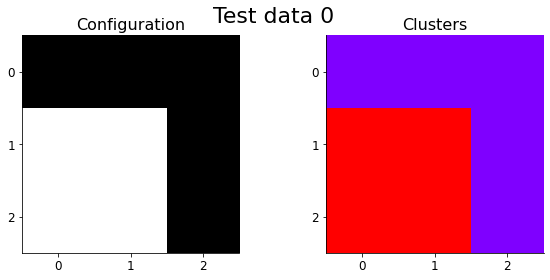

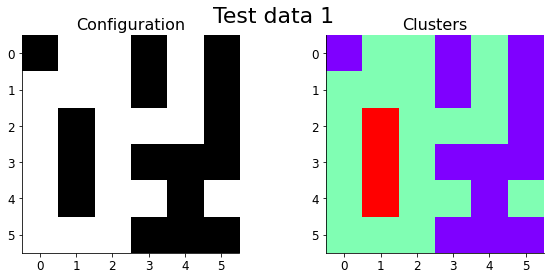

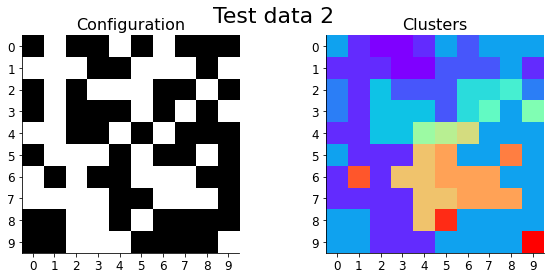

In [37]:
for i, config in enumerate([config_test_0, config_test_1, config_test_2]):
    labels = get_labels(config)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
    ax1.set_xticks(range(len(config)))
    ax1.set_yticks(range(len(config)))
    ax2.set_xticks(range(len(config)))
    ax2.set_yticks(range(len(config)))
    ax1.set_title("Configuration")
    ax2.set_title("Clusters")
    ax1.imshow(config, cmap="Greys")
    ax2.imshow(labels, cmap="rainbow")
    
    fig.suptitle(f"Test data {i}", fontsize=22)

If your function doesn't work, you might want to use this cell to inspect your results

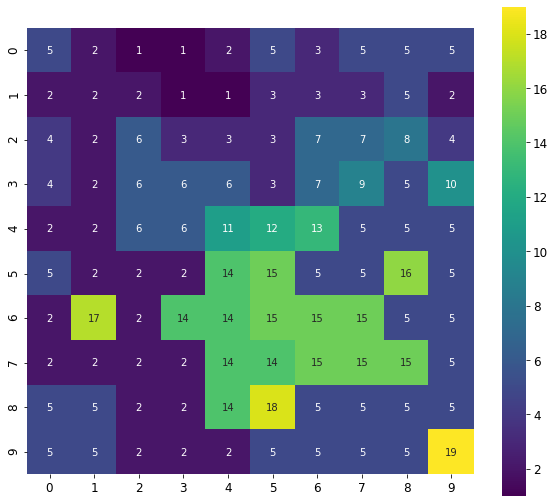

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10, 9))
ax.set_aspect(1)
sns.heatmap(labels, annot=True, ax=ax, cmap="viridis");

config_test_2 = np.array([[ 1, -1,  1,  1, -1,  1, -1,  1,  1,  1],
                          [-1, -1, -1,  1,  1, -1, -1, -1,  1, -1],
                          [ 1, -1,  1, -1, -1, -1,  1,  1, -1,  1],
                          [ 1, -1,  1,  1,  1, -1,  1, -1,  1, -1],
                          [-1, -1,  1,  1, -1,  1, -1,  1,  1,  1],
                          [ 1, -1, -1, -1,  1, -1,  1,  1, -1,  1],
                          [-1,  1, -1,  1,  1, -1, -1, -1,  1,  1],
                          [-1, -1, -1, -1,  1,  1, -1, -1, -1,  1],
                          [ 1,  1, -1, -1,  1, -1,  1,  1,  1,  1],
                          [ 1,  1, -1, -1, -1,  1,  1,  1,  1, -1]])

### Measuring cluster sizes
Use your `get_labels()` function to find clusters in a large Ising model, say $N=500$. You can use your own Ising implementation. If you use Sethna's code, remember that he uses $s \in \{0, 1\}$ spins!

In [39]:
%%time
N1=500
ising = IsingModel(N=N1, T=1, H=0)
config = ising.lattice*2-1
labels1 = get_labels(config)

CPU times: user 695 ms, sys: 10.8 ms, total: 706 ms
Wall time: 705 ms


In [40]:
%%time
N2=10**4
ising = IsingModel(N=N2, T=1, H=0)
config = ising.lattice*2-1
labels2 = get_labels(config)

CPU times: user 5min 31s, sys: 26.9 s, total: 5min 58s
Wall time: 6min


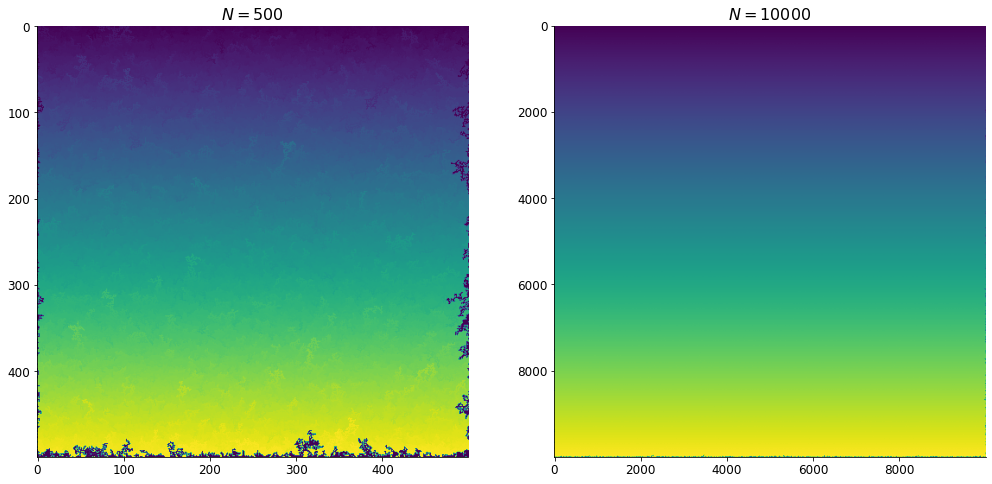

In [41]:
#plt.figure(figsize=(10, 8))
#plt.imshow(labels);

fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(17, 13))
ax1.imshow(labels1)
ax1.set_title(r"$N =$" + str(N1))
ax2.imshow(labels2)
ax2.set_title(r"$N =$" + str(N2));

### Exercise 4.18
Find an efficient way to measure cluster sizes. Remind that all you care about is the distribution of cluster sizes, their location does not matter. You might want to use the `.reshape()` method of a numpy array, and the `Counter` class from the `collections` package.

In [42]:
def get_sizes(labels):
    reshaped_labels = np.reshape(labels, len(labels)**2) #from NxN matrix to N^2 vector
    cluster_names, cluster_sizes = zip(*Counter(reshaped_labels).items())
    return cluster_sizes

### Exercise 4.19
For $T >> T_c$, spins are essentially uncorrelated. What is the distribution of cluster sizes you expect to find in this case? **Hint** Think about the 1D case assuming totally uncorrelated spins.

*Your answer here*

#### Answer

For a 1D system, assuming totally uncorrelated spins, we have that each cluster is of average lenght $e^{2/T}$ and since at any step there is a constant probability (at given temperature) of flipping the spin we have that the lenght of a cluster is distributed exponentially. 

From this we expect that the average lenght of a cluster decreases with the increasing of temperature, which it is also what we expect from the fact that an higher temperature means an higher entropy (disorder).

### Exercise 4.20
Do a simulation at very high temperature and measure the cluster size distribution. Plot your results in log-log scale. Do your results agree with your previous answer?

*Your answer here* 
The conclusions are at the end of the next exercise.

In [43]:
Temperature=10
N=500
ising = IsingModel(N=N, T=Temperature, H=0)
ising.SweepWolff(nTimes=22) #thermalize 
config = ising.lattice*2-1
labelsT = get_labels(config)
sizesT = get_sizes(labelsT)

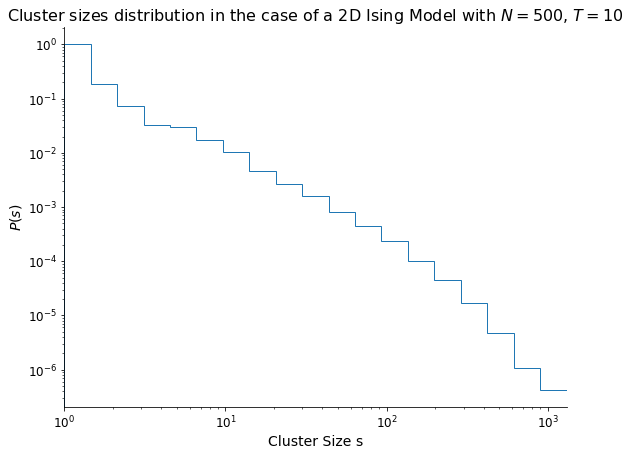

In [44]:
# use logarithmic bins and logarithmic axes!
bins = np.geomspace(min(sizesT), max(sizesT), num=20)
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
ax.hist(sizesT, bins=bins, histtype="step", density=1) #Density = 1 is needed to plot the probability instead of the occurence.
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(min(sizesT), max(sizesT));
# add axis labels
ax.set_xlabel(r"Cluster Size s")
ax.set_ylabel(r"$P(s)$")
ax.set_title(r"Cluster sizes distribution in the case of a 2D Ising Model with " r"$N=$"+ str(N)+ ", " r"$T=$" + str(Temperature));

### Exercise 4.21

At $T_c$, the distribution of cluster sizes is known to be a power law with exponent close to $\alpha \simeq 2$.

$$
P(s) \propto s^{-\alpha}
$$

Do a simulation at $T=T_c$ and compare the resulting cluster size distribution with that obtained at $T>>T_c$.

In [45]:
# do simulation
T_c=2/np.log(1+np.sqrt(2))
N=500
ising = IsingModel(N=N, T=T_c, H=0)
ising.SweepWolff(nTimes=13) #thermalize
config = ising.lattice*2-1
labelsTc = get_labels(config)
sizesTc = get_sizes(labelsTc)

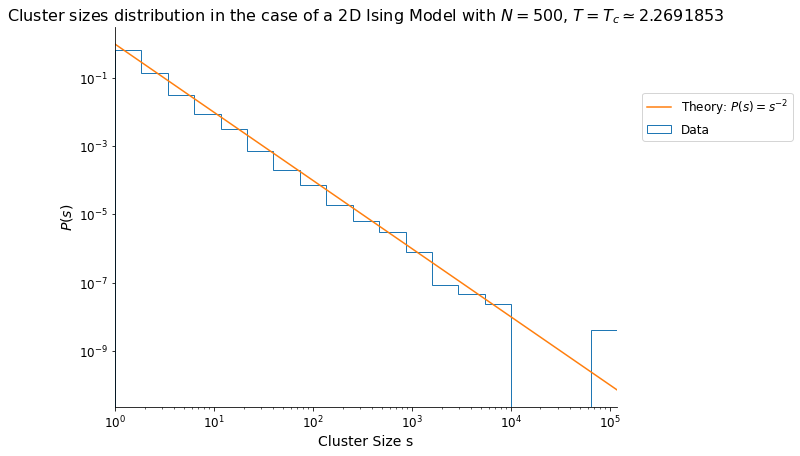

In [46]:
# plot results
bins = np.geomspace(min(sizesTc), max(sizesTc), num=20)
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(min(sizesTc), max(sizesTc));

ax.hist(sizesTc, bins=bins, histtype="step", label="Data", density=1) #Density = 1 is needed to plot the P(s) instead of the occurence.

length_array = np.array([
    x
    for x in np.geomspace(min(sizesTc), max(sizesTc), num=20)
])
theory_plot=pow(length_array, -2)
ax.plot(length_array, theory_plot, label="Theory: $P(s) = s^{-2}$");

# add axis labels
ax.set_xlabel(r"Cluster Size s")
ax.set_ylabel(r"$P(s)$")
ax.legend(loc=(1.05, 0.7))
ax.set_title(r"Cluster sizes distribution in the case of a 2D Ising Model with " r"$N=$"+ str(N)+ ", " r"$T=T_c \simeq$" + str("%.7f" % T_c));

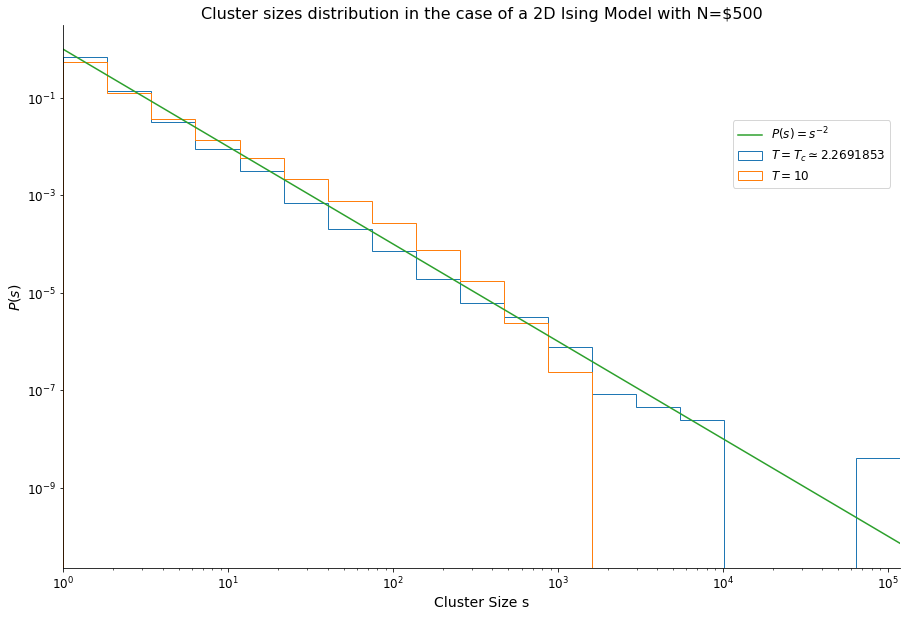

In [48]:
# plot results
bins1 = np.geomspace(min(sizesTc), max(sizesTc), num=20)
bins2 = np.geomspace(min(sizesT), max(sizesT), num=20)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(min(sizesTc), max(sizesTc));

ax.hist(sizesTc, bins=bins, histtype="step", label=r"$T=T_c \simeq$" + str("%.7f" % T_c), density=1)
ax.hist(sizesT, bins=bins, histtype="step", label=r"$T=$" + str(Temperature), density=1)
length_array = np.array([
    x
    for x in np.geomspace(min(sizesTc), max(sizesTc), num=20)
])

theory_plot=pow(length_array, -2)

ax.plot(length_array, theory_plot, label="$P(s) = s^{-2}$");

# add axis labels
ax.set_xlabel(r"Cluster Size s")
ax.set_ylabel(r"$P(s)$")
ax.legend(loc=(0.8, 0.7))
ax.set_title(r"Cluster sizes distribution in the case of a 2D Ising Model with N=$"+ str(N));


#### Answer

We can see that $P(s)$ is compatible with a power law $s^{-\alpha}$ with $\alpha \simeq 2$ for both $T=T_c$ and $T>>T_c$.

The main difference is that, as expected, for $T=10>>T_c$ the configuration is more uniform (the entropy is greater) and so large $(> 10^3)$ clusters are not present, while for $T=T_c$ we see that it is present a major cluster formed by $10^5$ sites, and other smaller ones formed by $10^3$ ÷ $10^4$ sites; as stated this is expected since $T=T_c$ is the critical temperature above which major clusters tends to not form anymore.

In [49]:
T3=3.5
N=500
ising3 = IsingModel(N=N, T=T3, H=0)
ising3.SweepWolff(nTimes=20)
config3 = ising3.lattice*2-1
labelsT3 = get_labels(config3)
sizesT3 = get_sizes(labelsT3)

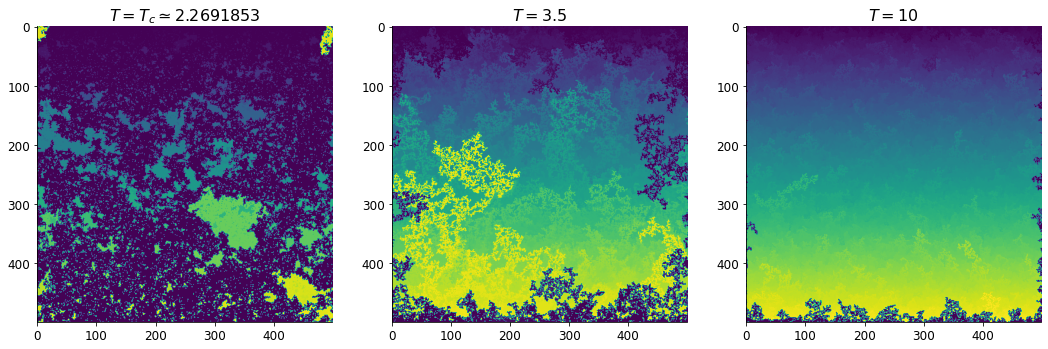

In [50]:
fig, (ax1, ax3, ax2)  = plt.subplots(1, 3, figsize=(18, 14))
ax1.imshow(labelsTc)
ax1.set_title(r"$T=T_c \simeq$" + str("%.7f" % T_c))
ax2.imshow(labelsT)
ax2.set_title(r"$T=$" + str(Temperature))
ax3.imshow(labelsT3)
ax3.set_title(r"$T=$" + str(T3));

#### Comment

We can see that for $T=T_c$ there is a very very large cluster (in dark blue in the image), for $T=3.5$ are present some big clusters but much smaller than for $T=T_c$, and for $T=10>>T_c$ the configuration is much more uniform.

## Extra: Another Get Label

At first I implemented another get_labels function, but since it was a recursive function I had to increase `sys.getrecursionlimit()` to at least $10^6$, the problem is that my kernel kept dying everytime I tried to run the last exercise, so I implemented the not-recursive one used above (that is also almost twice faster), here there is the code:

In [51]:
def fill(config, labels, newlabel, x, y):
    if labels[x][y] != 0:  #Already included in a cluster
        return 0
    S = config[x][y]
    labels[x][y]= newlabel
    size = 1
    if x+1 == config.shape[0]: #edge
        if config[0][y] == S:
            size += fill(config, labels, newlabel, 0, y)
    else:
        if config[x+1][y] == S:
            size += fill(config, labels, newlabel, x+1, y)
    if config[x-1][y] == S:
        size += fill(config, labels, newlabel, (x-1)%config.shape[0], y)
    
    if y+1 == config.shape[1]: #edge
        if config[x][0] == S:
            size += fill(config, labels, newlabel, x, 0)
    else:
        if config[x][y+1] == S:
            size += fill(config, labels, newlabel, x, y+1)
    
    if config[x][y-1] == S:
        size += fill(config, labels, newlabel, x, (y-1)%config.shape[1])
    return size

def get_labels2(config):
    """
    Get unique cluster labels.
    
    Parameters
    ----------
    config : np.array, (N, N)
        Configuration of the system in {-1, 1} notation
    Returns
    -------
    labels : np.array, (N, N)
        Labels that identify the clusters
    """
    N = len(config)
    labels = np.zeros((N,N), int)
    label = 1 #first label is 1
    for i in range(N):
        for j in range(N):
            size = fill(config, labels, label, i, j)
            if size !=0:
                label +=1 #increment label by one
    return labels

#### Comparison:

In [52]:
ising = IsingModel(N=700, T=1, H=0)
config = ising.lattice*2-1
%timeit labels1 = get_labels(config) #Not Recursive
%timeit labels2 = get_labels2(config) #Recursive

1 s ± 29.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.79 s ± 51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
